# Import Libraries

In [33]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# Loading and Understanding Data

In [34]:
df = pd.read_csv("most_streamed_spotify_songs_2024.csv", encoding="ISO-8859-1")
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [35]:
df.shape

(4600, 29)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [37]:
df.drop('ISRC', axis = 1, inplace = True)
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
       'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

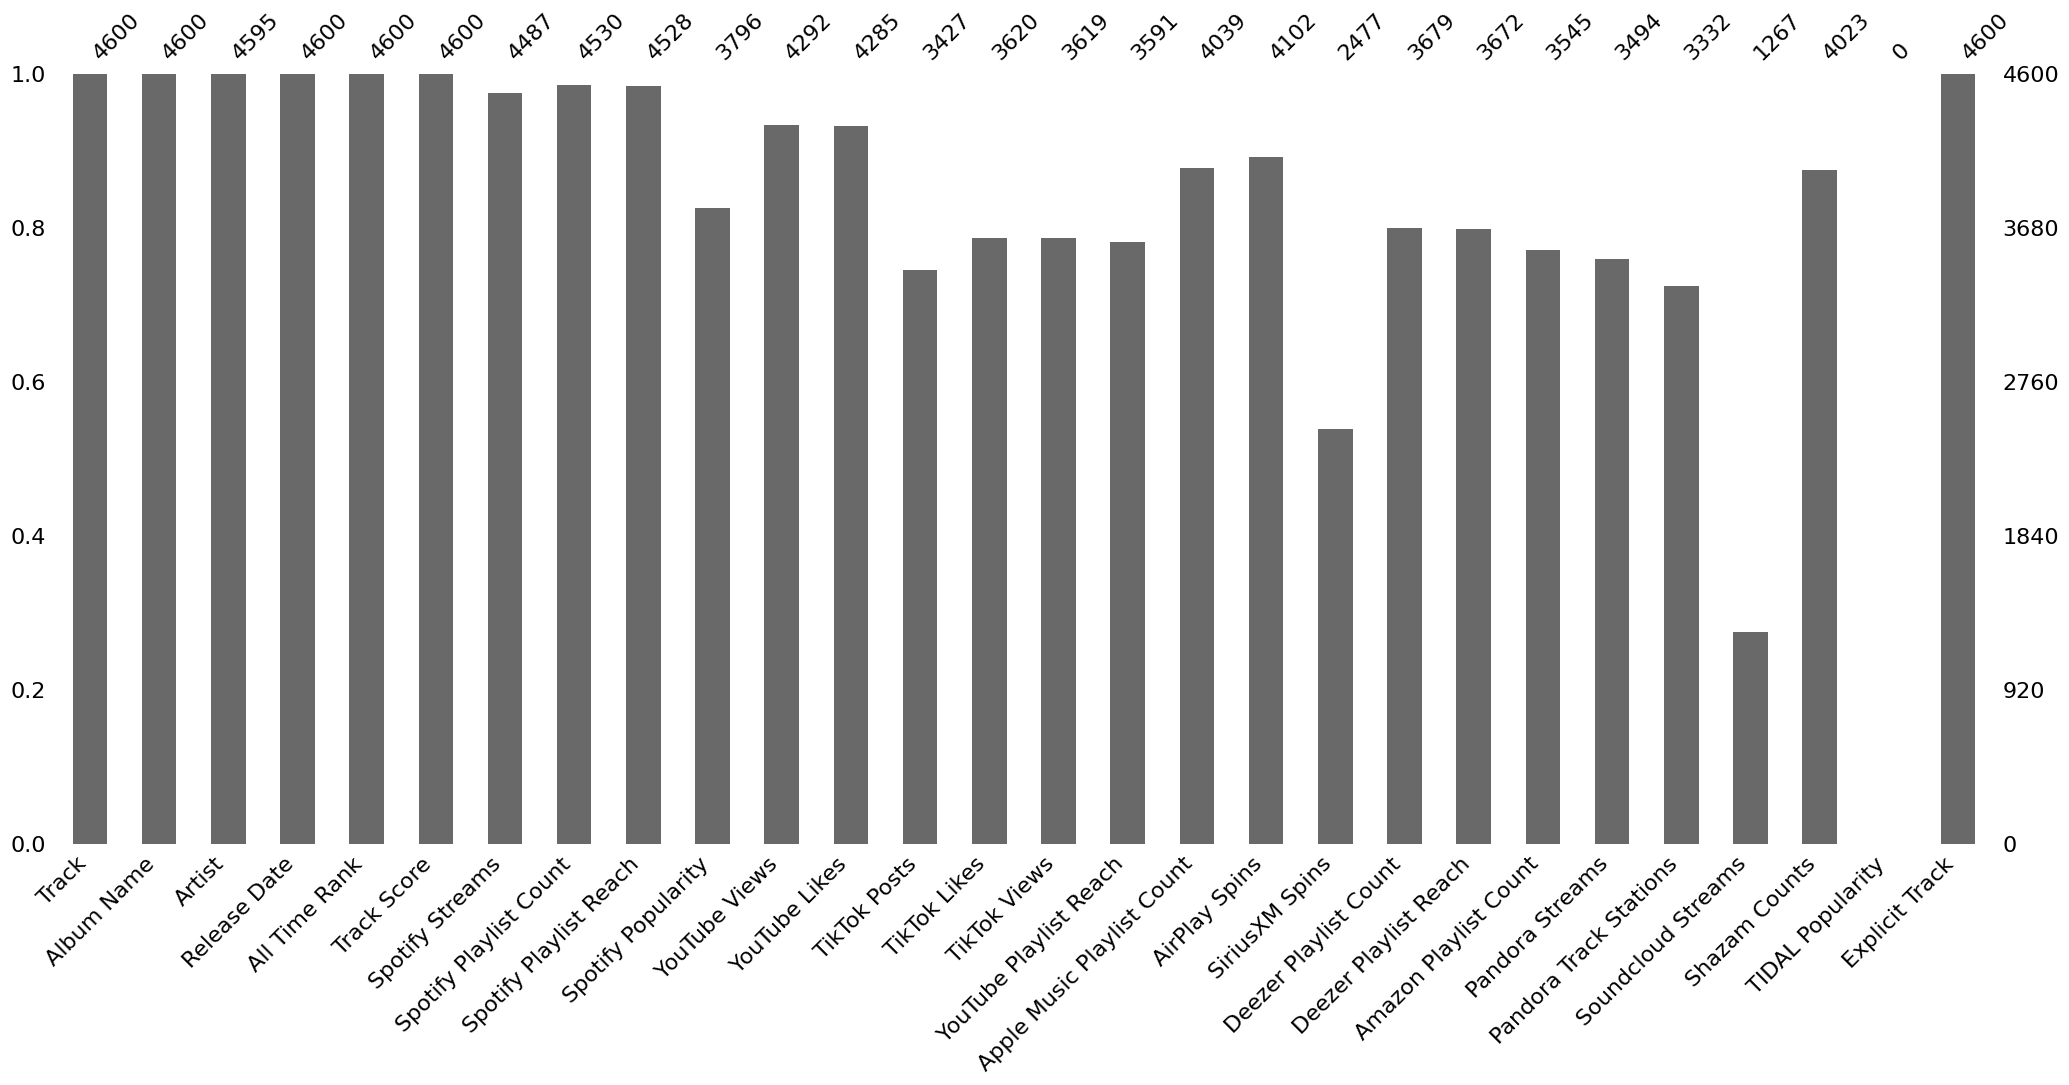

In [38]:
import missingno as msno

msno.bar(df)
plt.show()

In [39]:
df.isnull().sum().sort_values(ascending = False)

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
Track Score                      0
Release Date                     0
Track                            0
All Time Rank                    0
Album Name                       0
Explicit Track                   0
dtype: int64

# Feature Engineering

In [40]:
df.drop(['TIDAL Popularity','Soundcloud Streams'], axis = 1, inplace = True)
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
       'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Shazam Counts', 'Explicit Track'],
      dtype='object')

Formatting all columns

In [41]:
df = df.map(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,390470936,30716,196631588,92.0,...,210.0,40975,684,62.0,17598718,114.0,18004655,22931,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,323703884,28113,174597137,92.0,...,188.0,40778,3,67.0,10422430,111.0,7780028,28444,1118279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,601309283,54331,211607669,92.0,...,190.0,74333,536,136.0,36321847,172.0,5022621,5639,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,2031280633,269802,136569078,85.0,...,394.0,1474799,2182,264.0,24684248,210.0,190260277,203384,11822942,0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,107034922,7223,151469874,88.0,...,182.0,12185,1,82.0,17660624,105.0,4493884,7006,457017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,4585,19.4,305049963,65770,5103054,71.0,...,3.0,6,NaN,2.0,14217,NaN,20104066,13184,656337,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,4575,19.4,52282360,4602,1449767,56.0,...,1.0,412,NaN,1.0,927,NaN,NaN,NaN,193590,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,4571,19.4,189972685,72066,6704802,65.0,...,19.0,204,NaN,1.0,74,6.0,84426740,28999,1135998,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,4591,19.4,145467020,14037,7387064,66.0,...,1.0,1200,NaN,NaN,NaN,7.0,6817840,NaN,448292,0


Creating new columns - Extracting year and month from Datetime column

In [42]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format = '%m/%d/%Y')

df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month



Dealing with duplicates

In [43]:
df.duplicated().sum()

np.int64(2)

Keeping only first occurrence

In [44]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

np.int64(0)

Formatting all the datatypes

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4593 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   All Time Rank               4598 non-null   object        
 5   Track Score                 4598 non-null   float64       
 6   Spotify Streams             4485 non-null   object        
 7   Spotify Playlist Count      4528 non-null   object        
 8   Spotify Playlist Reach      4526 non-null   object        
 9   Spotify Popularity          3794 non-null   float64       
 10  YouTube Views               4290 non-null   object        
 11  YouTube Likes               4283 non-null   object        
 1

In [46]:
for x in df.columns[6:]:
    df.loc[:,x] = pd.to_numeric(df[x])
    print(df[x].dtype)
    

object
object
object
float64
object
object
object
object
object
object
float64
object
object
float64
object
float64
object
object
object
int64
int32
int32


Imputing mean for null values in numerical columns using SimpleImputer

In [47]:
from sklearn.impute import SimpleImputer

for col in df.columns[6:]:
    df.loc[:,col] = pd.to_numeric(df[col], errors = "coerce")
    
imputer = SimpleImputer(strategy = "mean")

for col in df.columns[6:]:
    df.loc[:,col] = imputer.fit_transform(df[[col]])

print(df.isnull().sum())


Track                         0
Album Name                    0
Artist                        5
Release Date                  0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
Year                          0
Month                         0
dtype: int64


# EDA

Correlation Matrix

<Axes: >

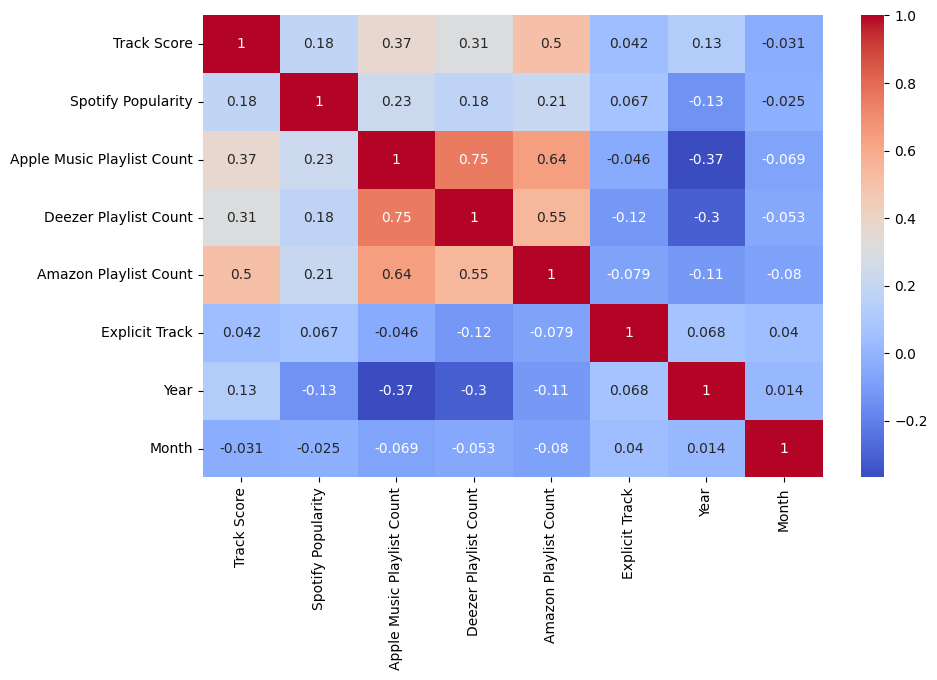

In [48]:
plt.figure(figsize = (10, 6))
numeric_df = df.select_dtypes(include = ['float64', 'int64', 'int32'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")

Top 20 Streaming Artists on Spotify

Text(0.5, 1.0, 'Top 20 Streaming Artists on Spotify')

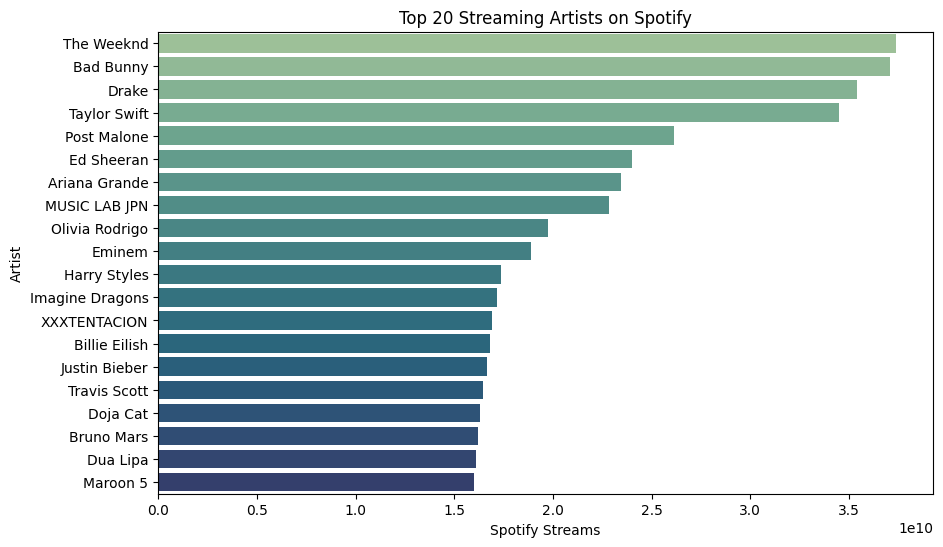

In [49]:
top_20_spotify_artists = df.groupby('Artist', as_index = False)['Spotify Streams'].sum()
top_20_spotify_artists = top_20_spotify_artists.sort_values('Spotify Streams', ascending=False).head(20)
top_20_spotify_artists = top_20_spotify_artists.dropna(subset=['Spotify Streams', 'Artist'])

plt.figure(figsize = (10, 6))
ax = sns.barplot(y = 'Artist', x ='Spotify Streams', data = top_20_spotify_artists, palette = 'crest')

plt.title('Top 20 Streaming Artists on Spotify')

Top 20 Streaming Songs on Spotify

Text(0.5, 1.0, 'Top 20 Streaming Songs on Spotify')

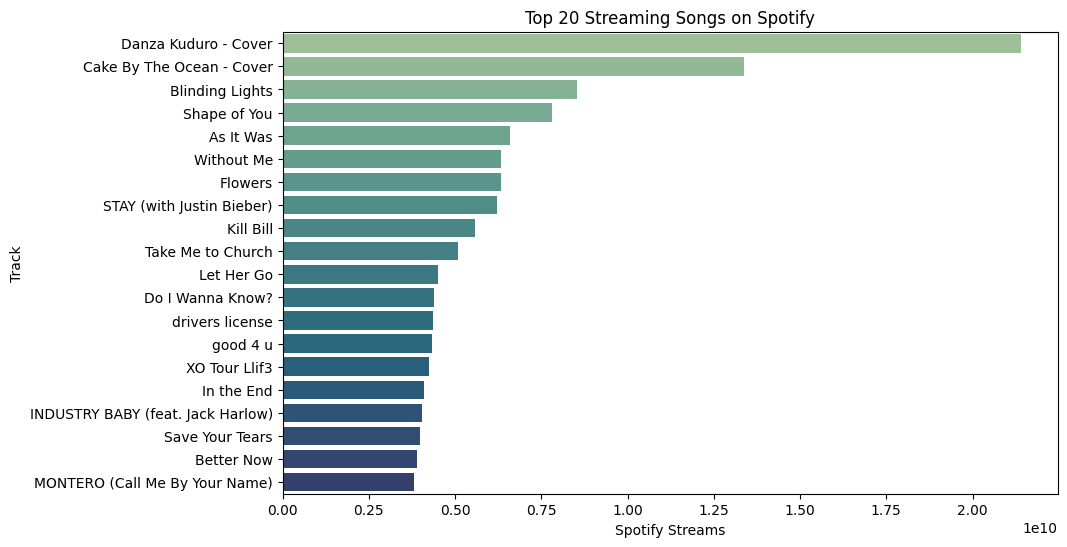

In [50]:
top_20_spotify_tracks = df.groupby('Track', as_index = False)['Spotify Streams'].sum()
top_20_spotify_tracks = top_20_spotify_tracks.sort_values('Spotify Streams', ascending = False).head(20)
top_20_spotify_tracks = top_20_spotify_tracks.dropna(subset=['Spotify Streams', 'Track'])

plt.figure(figsize = (10,6))
sns.barplot(y = 'Track', x = 'Spotify Streams', data = top_20_spotify_tracks, palette = 'crest')
plt.title('Top 20 Streaming Songs on Spotify')

Top 20 Streaming Artists on YouTube

Text(0.5, 1.0, 'Top 20 Streaming Artists on YouTube')

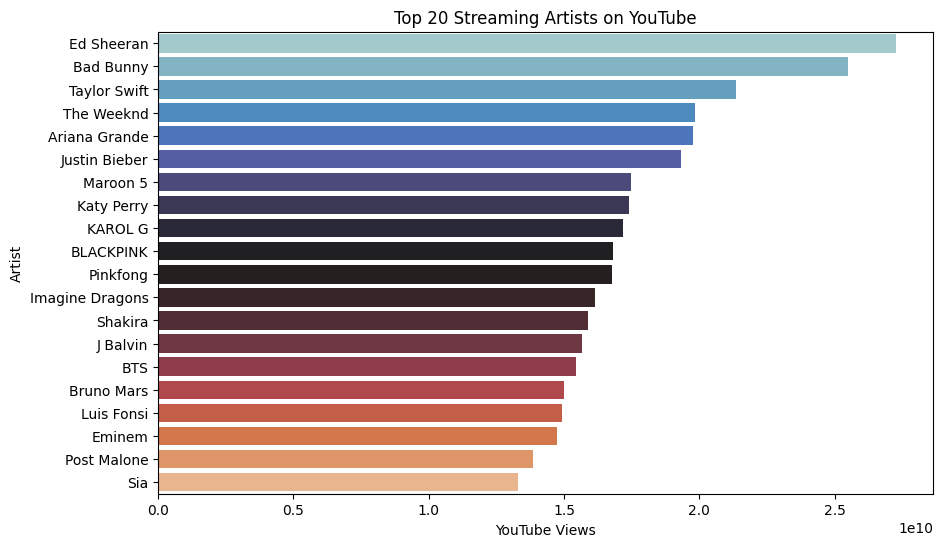

In [51]:
top_20_youtube_artists = df.groupby('Artist', as_index = False)['YouTube Views'].sum()
top_20_youtube_artists = top_20_youtube_artists.sort_values('YouTube Views', ascending = False).head(20)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'YouTube Views', y = 'Artist', data = top_20_youtube_artists, palette = 'icefire')
plt.title('Top 20 Streaming Artists on YouTube')

Top 20 Streaming Songs on YouTube

Text(0.5, 1.0, 'Top 20 Streaming Songs on YouTube')

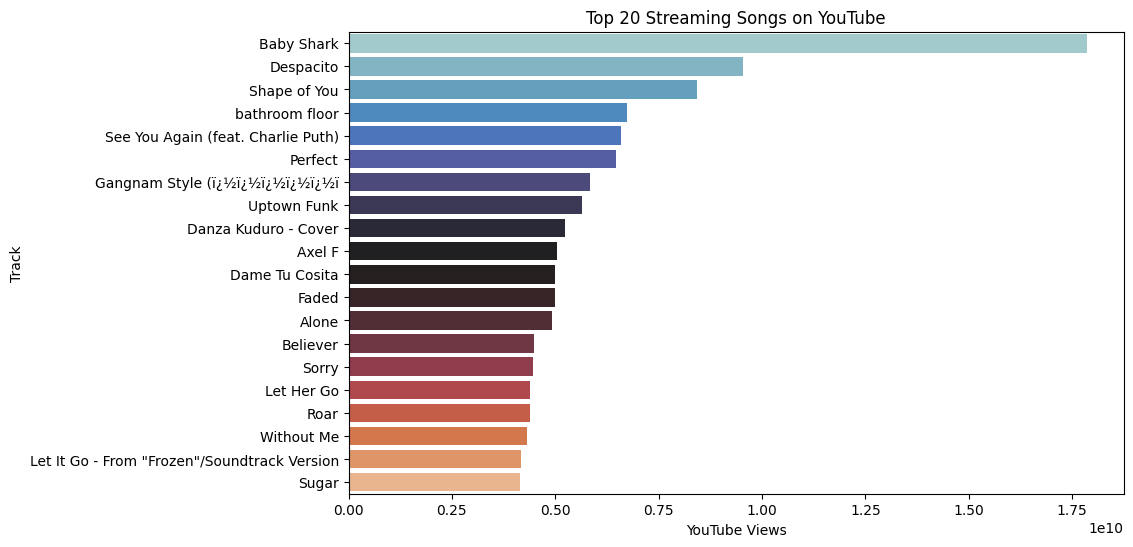

In [52]:
top_20_youtube_tracks = df.groupby('Track', as_index = False)['YouTube Views'].sum()
top_20_youtube_tracks = top_20_youtube_tracks.sort_values('YouTube Views', ascending = False).head(20)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'YouTube Views', y = 'Track', data = top_20_youtube_tracks, palette = 'icefire')
plt.title('Top 20 Streaming Songs on YouTube')

In [53]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
       'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Shazam Counts', 'Explicit Track', 'Year', 'Month'],
      dtype='object')

Trend of Track Releases

Text(0.5, 0, 'Year')

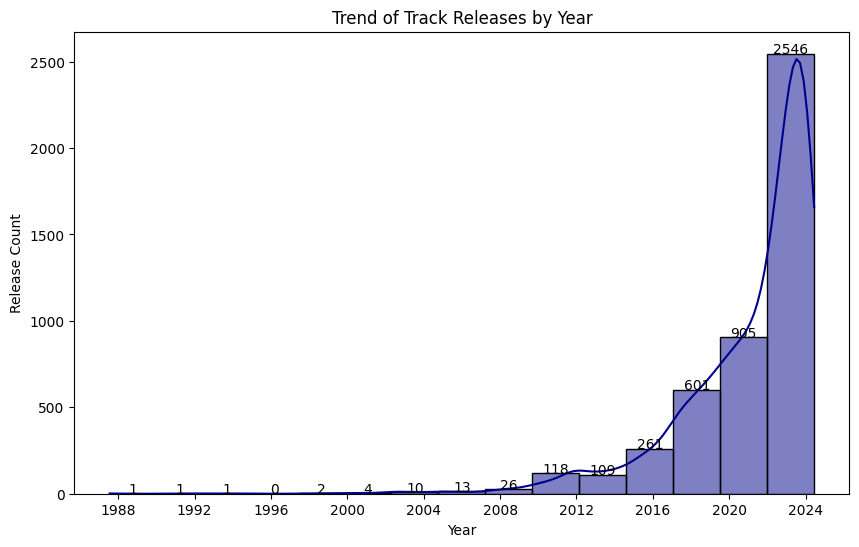

In [54]:
plt.figure(figsize = (10, 6))
ax = sns.histplot(df['Release Date'], bins = 15, kde = True, color = 'darkblue')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha = "center")


plt.title('Trend of Track Releases by Year')
plt.ylabel('Release Count')
plt.xlabel('Year')

Let's view the release trend in the last 5 years.

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

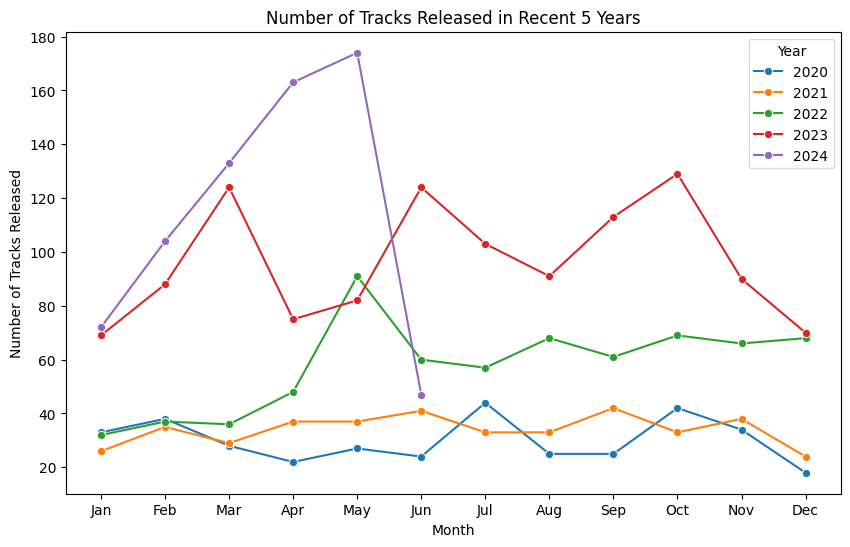

In [55]:
import calendar

plt.figure(figsize = (10,6))

monthly_releases = df.groupby(['Year','Month']).size().reset_index(name = "Count")
recent_years = monthly_releases.Year.unique()[-5:]
recent_data = monthly_releases[monthly_releases['Year'].isin(recent_years)]

ax = sns.lineplot(data=recent_data, x='Month', y='Count', hue='Year', palette='tab10', marker = 'o')
plt.title('Number of Tracks Released in Recent 5 Years')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')

month_names = [calendar.month_abbr[i] for i in range(1,13)]
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)

Spotify Streams vs Playlist Counts with Explicit Content

<Axes: xlabel='Spotify Streams', ylabel='Spotify Playlist Count'>

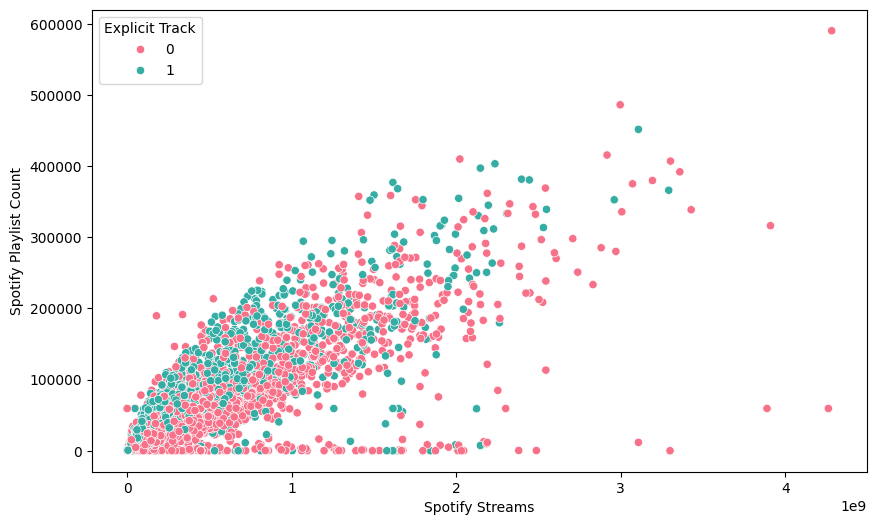

In [56]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Spotify Streams', y = 'Spotify Playlist Count', hue = 'Explicit Track',data = df, palette = 'husl')

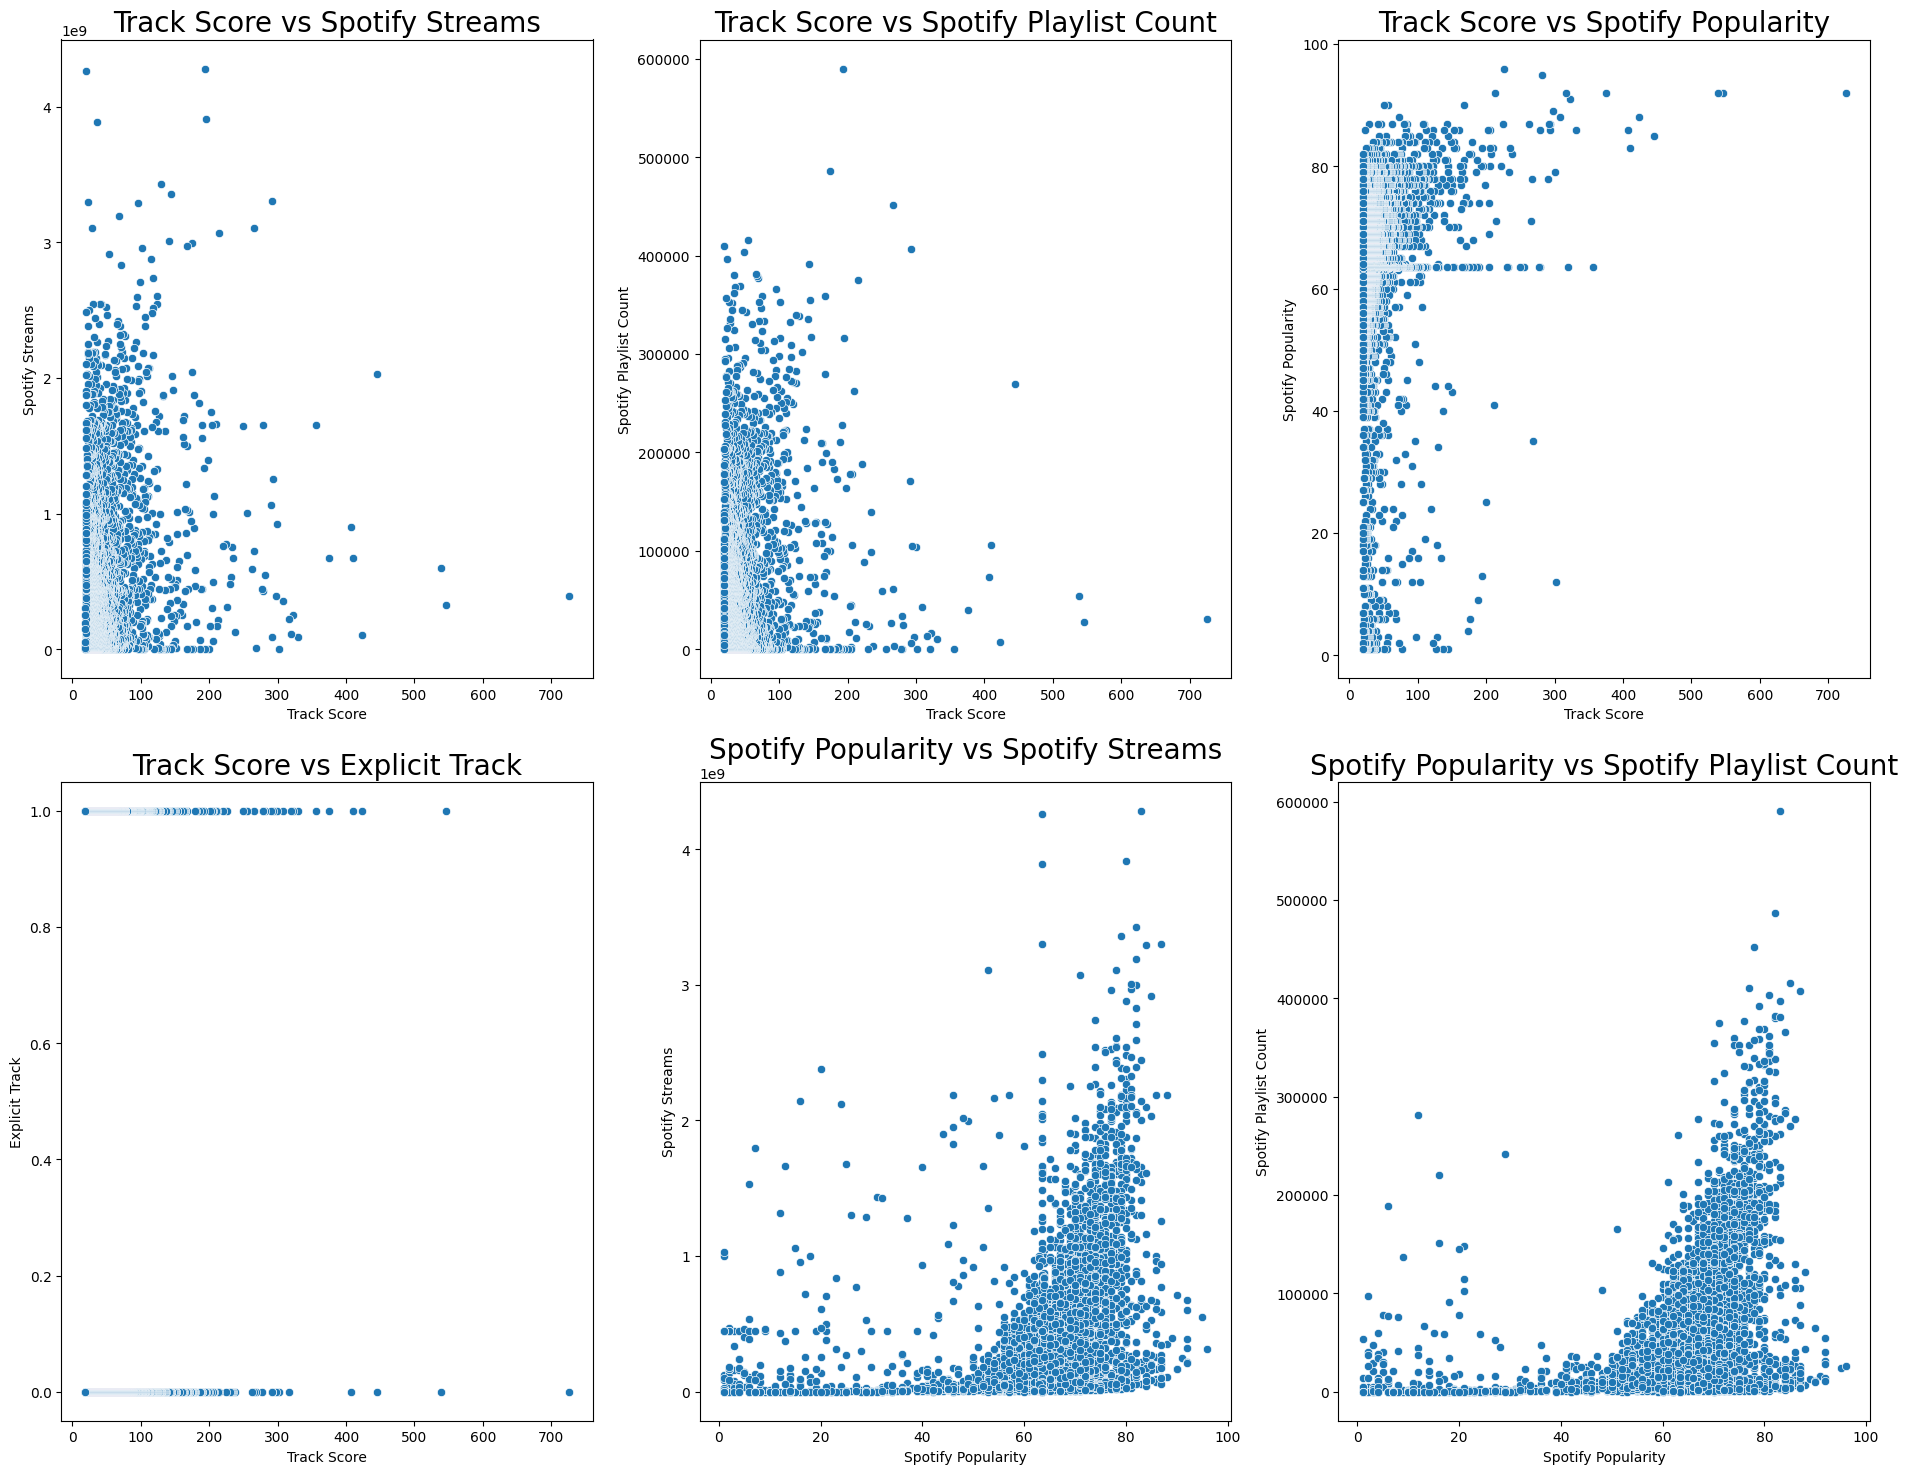

In [57]:
fig, ax = plt.subplots(figsize=(19,15),nrows=2,ncols=3)


sns.scatterplot(x='Track Score', y='Spotify Streams', data=df,ax=ax[0,0])
ax[0,0].set_xlabel('Track Score')
ax[0,0].set_ylabel('Spotify Streams')
ax[0,0].set_title('Track Score vs Spotify Streams',fontsize=20)


sns.scatterplot(x='Track Score', y='Spotify Playlist Count', data=df,ax=ax[0,1])
ax[0,1].set_xlabel('Track Score')
ax[0,1].set_ylabel('Spotify Playlist Count')
ax[0,1].set_title('Track Score vs Spotify Playlist Count',fontsize=20)


sns.scatterplot(x='Track Score', y='Spotify Popularity', data=df,ax=ax[0,2])
ax[0,2].set_xlabel('Track Score')
ax[0,2].set_ylabel('Spotify Popularity')
ax[0,2].set_title('Track Score vs Spotify Popularity',fontsize=20)


sns.scatterplot(x='Track Score', y='Explicit Track', data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Track Score')
ax[1,0].set_ylabel('Explicit Track')
ax[1,0].set_title('Track Score vs Explicit Track',fontsize=20)


sns.scatterplot(x='Spotify Popularity', y='Spotify Streams', data=df,ax=ax[1,1])
ax[1,1].set_xlabel('Spotify Popularity')
ax[1,1].set_ylabel('Spotify Streams')
ax[1,1].set_title('Spotify Popularity vs Spotify Streams',fontsize=20)


sns.scatterplot(x='Spotify Popularity', y='Spotify Playlist Count', data=df,ax=ax[1,2])
ax[1,2].set_xlabel('Spotify Popularity')
ax[1,2].set_ylabel('Spotify Playlist Count')
ax[1,2].set_title('Spotify Popularity vs Spotify Playlist Count',fontsize=20)


plt.tight_layout()
plt.show()